In [5]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/9d/f9/0e/a8de3e98e64bbf828f5e762936ff5a40e72331dbe663470711
Successfully built scikit-fuzzy


Importación de librerías

In [0]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Leyendo archivos

In [7]:
latte = pd.read_csv(filepath_or_buffer="latte.csv")
print(latte)

    tamano temperatura intensidad   agua   cafe  leche tiempo
0  Pequeño        Frío      Suave   Poca   Poca  Media  Media
1  Pequeño    Caluroso      Medio   Poca   Poca   Poca   Poca
2  Mediano      Cálido      Medio  Media  Media  Media   Poca
3  Mediano    Caluroso     Fuerte  Media  Mucha   Poca   Poca
4   Grande        Frío     Fuerte  Mucha  Mucha   Poca  Mucha
5   Grande      Cálido      Suave  Mucha   Poca  Mucha  Media


In [9]:
mokaccino = pd.read_csv(filepath_or_buffer="mokaccino.csv")
print(mokaccino)

    tamano temperatura intensidad   agua   cafe  leche chocolate tiempo
0  Pequeño      Cálido     Fuerte   Poca  Media   Poca      Poca   Poca
1  Pequeño    Caluroso      Suave   Poca   Poca  Media      Poca   Poca
2  Mediano        Frío      Medio  Media  Media  Media      Poca  Media
3  Mediano    Caluroso     Fuerte  Media  Media   Poca      Poca   Poca
4   Grande        Frío     Fuerte  Mucha  Media  Media      Poca  Mucha
5   Grande      Cálido      Suave  Mucha   Poca  Media      Poca  Media


In [10]:
capuccino = pd.read_csv(filepath_or_buffer="capuccino.csv")
print(capuccino)

    tamano temperatura intensidad   agua   cafe  leche tiempo
0  Pequeño        Frío      Suave   Poca   Poca  Media  Media
1  Pequeño      Cálido     Fuerte   Poca  Media   Poca   Poca
2  Mediano      Cálido      Medio  Media  Media  Media  Media
3  Mediano    Caluroso     Fuerte  Media  Media   Poca   Poca
4   Grande      Cálido      Suave  Mucha   Poca  Media  Media
5   Grande        Frío     Fuerte  Mucha  Media   Poca  Mucha


In [11]:
espresso = pd.read_csv(filepath_or_buffer="espresso.csv")
print(espresso)

    tamano temperatura intensidad   agua   cafe tiempo
0  Pequeño        Frío      Suave   Poca   Poca  Media
1  Pequeño      Cálido     Fuerte   Poca  Media   Poca
2  Mediano      Cálido      Medio  Media   Poca   Poca
3  Mediano    Caluroso     Fuerte  Media  Media   Poca
4   Grande        Frío      Suave  Mucha  Media  Media
5   Grande    Caluroso      Medio  Mucha  Media   Poca


# Antecedentes

* Tamaño del café: Pequeño, Mediano y Grande.


In [0]:
tamano = ctrl.Antecedent(np.arange(0, 600, 1), "Tamaño")
tamano["Pequeño"] = fuzz.trimf(tamano.universe, [0, 0, 200])
tamano["Mediano"] = fuzz.trimf(tamano.universe, [150, 200, 400])
tamano["Grande"] = fuzz.trimf(tamano.universe, [350, 400, 600])

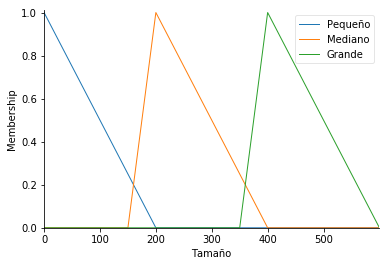

In [90]:
tamano.view()



*   Intensidad del cafe: Suave, Medio y Fuerte



In [0]:
intensidad = ctrl.Antecedent(np.arange(0, 5.5, 0.5), "Intensidad")
intensidad["Suave"] = fuzz.trimf(intensidad.universe, [0, 0, 2])
intensidad["Medio"] = fuzz.trimf(intensidad.universe, [1.5, 2.5, 3.5])
intensidad["Fuerte"] = fuzz.trimf(intensidad.universe, [3, 4, 5])

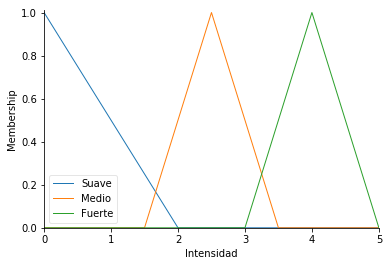

In [92]:
intensidad.view()


*  Temperatura de ambiente: Frio, Caliente y Caluroso



In [24]:

temperatura = ctrl.Antecedent(np.arange(0, 30, 1), "Temperatura")
temperatura["Frío"] = fuzz.trimf(temperatura.universe, [0, 0, 10])
temperatura["Cálido"] = fuzz.trimf(temperatura.universe, [8, 15, 20])
temperatura["Caluroso"] = fuzz.trimf(temperatura.universe, [18, 25, 30])

NameError: ignored

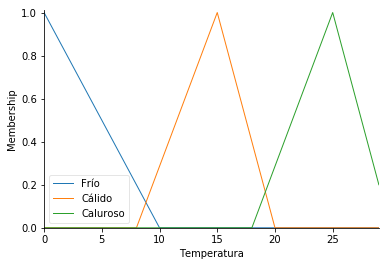

In [94]:
temperatura.view()


# Consecuentes

*  Leche: Poca, Media y Mucha.

In [0]:
leche = ctrl.Consequent(np.arange(0, 40, 1), "Leche")
leche["Poca"] = fuzz.trimf(leche.universe, [0, 0, 15])
leche["Media"] = fuzz.trimf(leche.universe, [12, 20, 25])
leche["Mucha"] = fuzz.trimf(leche.universe, [22, 35, 40])

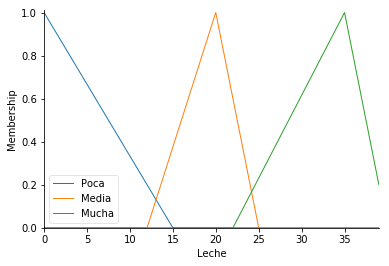

In [27]:
leche.view()


*  Chocolate: Poco, Medio y Mucho.

In [0]:
chocolate = ctrl.Consequent(np.arange(0, 40, 1), "Chocolate")
chocolate["Poca"] = fuzz.trimf(chocolate.universe, [0, 0, 15])
chocolate["Media"] = fuzz.trimf(chocolate.universe, [12, 20, 25])
chocolate["Mucha"] = fuzz.trimf(chocolate.universe, [22, 35, 40])

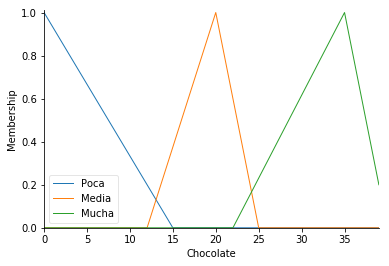

In [166]:
chocolate.view()


* Nivel de agua: Poca, Media y Mucha.

In [0]:
agua = ctrl.Consequent(np.arange(0, 600, 1), "Agua")
agua["Poca"] = fuzz.trimf(agua.universe, [0, 0, 200])
agua["Media"] = fuzz.trimf(agua.universe, [150, 200, 400])
agua["Mucha"] = fuzz.trimf(agua.universe, [350, 400, 600])

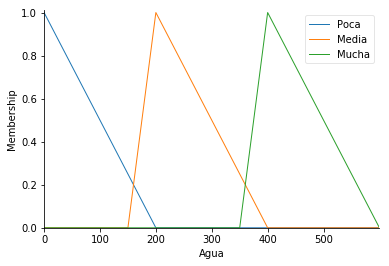

In [100]:
agua.view()



*   Café: Poco, Media y Mucho.



In [0]:
cafe = ctrl.Consequent(np.arange(0, 40, 1), "Cafe")
cafe["Poca"] = fuzz.trimf(cafe.universe, [0, 0, 15])
cafe["Media"] = fuzz.trimf(cafe.universe, [12, 20, 25])
cafe["Mucha"] = fuzz.trimf(cafe.universe, [22, 35, 40])

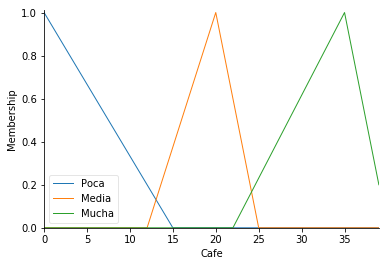

In [102]:
cafe.view()



*   Tiempo: Poca, Media y Mucha.



In [0]:
tiempo = ctrl.Consequent(np.arange(0, 7, 0.5), "Tiempo")
tiempo["Poca"] = fuzz.trimf(tiempo.universe, [0, 0, 2.5])
tiempo["Media"] = fuzz.trimf(tiempo.universe, [2, 3, 5])
tiempo["Mucha"] = fuzz.trimf(tiempo.universe, [4.5, 6, 7])

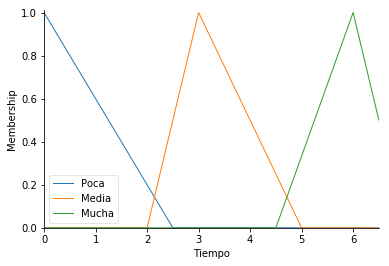

In [104]:

tiempo.view()

# Reglas

## Cafe Expresso 

In [20]:
reglasEspresso = []

for index, row in espresso.iterrows():
    #print(row)
    antecedente = tamano[row["tamano"]] & temperatura[row["temperatura"]] & intensidad[row["intensidad"]]
    consecuente = (agua[row["agua"]], cafe[row["cafe"]], tiempo[row["tiempo"]])
    regla  = ctrl.Rule(antecedente, consecuente)
    reglasEspresso.append(regla)
    print(regla)
    print("\n")

IF (Tamaño[Pequeño] AND Temperatura[Frío]) AND Intensidad[Suave] THEN [Agua[Poca], Cafe[Poca], Tiempo[Media]]
	AND aggregation function : fmin
	OR aggregation function  : fmax


IF (Tamaño[Pequeño] AND Temperatura[Cálido]) AND Intensidad[Fuerte] THEN [Agua[Poca], Cafe[Media], Tiempo[Poca]]
	AND aggregation function : fmin
	OR aggregation function  : fmax


IF (Tamaño[Mediano] AND Temperatura[Cálido]) AND Intensidad[Medio] THEN [Agua[Media], Cafe[Poca], Tiempo[Poca]]
	AND aggregation function : fmin
	OR aggregation function  : fmax


IF (Tamaño[Mediano] AND Temperatura[Caluroso]) AND Intensidad[Fuerte] THEN [Agua[Media], Cafe[Media], Tiempo[Poca]]
	AND aggregation function : fmin
	OR aggregation function  : fmax


IF (Tamaño[Grande] AND Temperatura[Frío]) AND Intensidad[Suave] THEN [Agua[Mucha], Cafe[Media], Tiempo[Media]]
	AND aggregation function : fmin
	OR aggregation function  : fmax


IF (Tamaño[Grande] AND Temperatura[Caluroso]) AND Intensidad[Medio] THEN [Agua[Mucha], Cafe[Media]

In [0]:
espressoCtrl = ctrl.ControlSystem(reglasEspresso)
preparacionEspresso = ctrl.ControlSystemSimulation(espressoCtrl)

In [34]:
size = input("Tamaño del cafe: " )
temperature = input("Temperatura ambiente: " )
intenity = input("Intensidad del café: " )

Tamaño del cafe: 390
Temperatura ambiente: 20
Intensidad del café: 2


In [0]:
preparacionEspresso.input["Tamaño"] = int(size)
preparacionEspresso.input["Temperatura"] = int(temperature)
preparacionEspresso.input["Intensidad"] = int(intenity)
preparacionEspresso.compute()

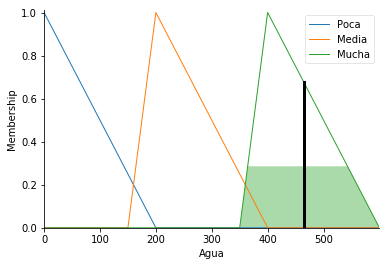

In [40]:
agua.view(sim = preparacionEspresso)

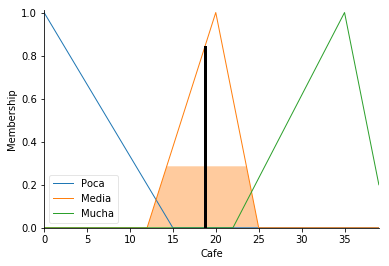

In [39]:
cafe.view(sim = preparacionEspresso)

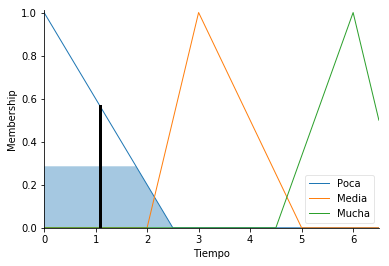

In [38]:
tiempo.view(sim = preparacionEspresso)

In [31]:
print("Agua (ml): {}".format(preparacionEspresso.output["Agua"]))
print("Café (gr): {}".format(preparacionEspresso.output["Cafe"]))
print("Tiempo (min): {}".format(preparacionEspresso.output["Tiempo"]))

Agua (ml): 464.87546201787444
Café (gr): 18.702380952380956
Tiempo (min): 1.0813492063492063


## Cafe Capuccino 

In [191]:
reglasCapuccino = []

for index, row in capuccino.iterrows():
    #print(row)
    antecedente = tamano[row["tamano"]] & temperatura[row["temperatura"]] & intensidad[row["intensidad"]]
    consecuente = (agua[row["agua"]], cafe[row["cafe"]], tiempo[row["tiempo"]], leche[row["leche"]])
    regla  = ctrl.Rule(antecedente, consecuente)
    reglasCapuccino.append(regla)
    print(regla)
    print("\n")

IF (Tamaño[Pequeño] AND Temperatura[Frío]) AND Intensidad[Suave] THEN [Agua[Poca], Cafe[Poca], Tiempo[Media], Leche[Media]]
	AND aggregation function : fmin
	OR aggregation function  : fmax


IF (Tamaño[Pequeño] AND Temperatura[Cálido]) AND Intensidad[Fuerte] THEN [Agua[Poca], Cafe[Media], Tiempo[Poca], Leche[Poca]]
	AND aggregation function : fmin
	OR aggregation function  : fmax


IF (Tamaño[Mediano] AND Temperatura[Cálido]) AND Intensidad[Medio] THEN [Agua[Media], Cafe[Media], Tiempo[Media], Leche[Media]]
	AND aggregation function : fmin
	OR aggregation function  : fmax


IF (Tamaño[Mediano] AND Temperatura[Caluroso]) AND Intensidad[Fuerte] THEN [Agua[Media], Cafe[Media], Tiempo[Poca], Leche[Poca]]
	AND aggregation function : fmin
	OR aggregation function  : fmax


IF (Tamaño[Grande] AND Temperatura[Cálido]) AND Intensidad[Suave] THEN [Agua[Mucha], Cafe[Poca], Tiempo[Media], Leche[Media]]
	AND aggregation function : fmin
	OR aggregation function  : fmax


IF (Tamaño[Grande] AND Temp

In [0]:
capuccinoCtrl = ctrl.ControlSystem(reglasCapuccino)
preparacionCapuccino = ctrl.ControlSystemSimulation(capuccinoCtrl)

In [1]:
size = input("Tamaño del cafe: " )
temperature = input("Temperatura ambiente: " )
intenity = input("Intensidad del café: " )

Tamaño del cafe: 500
Temperatura ambiente: 20
Intensidad del café: 2


In [2]:
preparacionCapuccino.input["Tamaño"] = int(size)
preparacionCapuccino.input["Temperatura"] = int(temperature)
preparacionCapuccino.input["Intensidad"] = int(intenity)
preparacionCapuccino.compute()

NameError: ignored

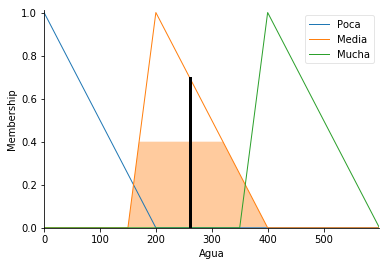

In [195]:
agua.view(sim = preparacionCapuccino)

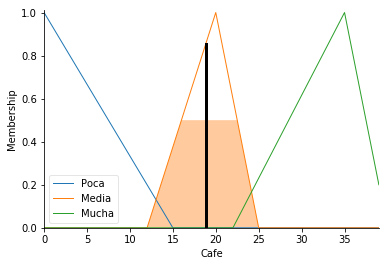

In [158]:
cafe.view(sim = preparacionCapuccino)

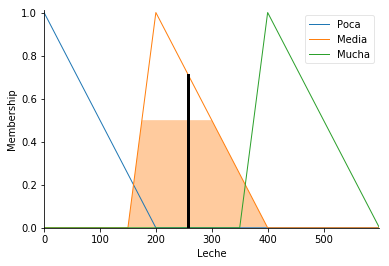

In [159]:
leche.view(sim = preparacionCapuccino)

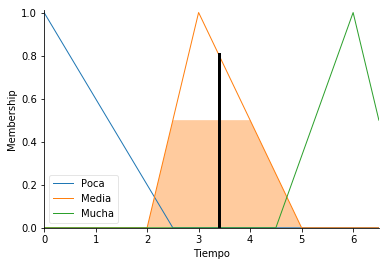

In [160]:
tiempo.view(sim = preparacionCapuccino)

In [196]:
print("Agua (ml): {}".format(preparacionCapuccino.output["Agua"]))
print("Café (gr): {}".format(preparacionCapuccino.output["Cafe"]))
print("Tiempo (min): {}".format(preparacionCapuccino.output["Tiempo"]))
print("Leche (ml): {}".format(preparacionCapuccino.output["Leche"]))

Agua (ml): 261.25000000000045
Café (gr): 18.775000000000006
Tiempo (min): 3.408333333333333
Leche (ml): 18.775000000000006


## Cafe Latte 

## Cafe Mokaccino 